# Plotting downtime frequency and period based on the turbine category

In [ ]:
"""Plotting downtime frequency and period based on the turbine category

"""

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# read turbine categories data
tc = pd.read_csv('data/turbine_categories.csv')
# convert category ID to float
tc['Turbine Category id'] = tc['Turbine Category id'].astype(np.float64)
# sort by frequency of category / turbine / year
tc = tc.sort_values(by='freq/T/yr')
# list of numbers for each category ID
tc['number'] = range(0, 23)
# reset index
tc.reset_index(drop=True, inplace=True)

In [1]:
tc

,Turbine Category id,Turbine Categories,freq/T/yr,period/T/yr,number
0,0.0,Unknown,0.000,0.000000,0
1,17.0,Retrofit,0.000,0.000000,1
2,14.0,Noise Constraints,0.000,0.000000,2
3,21.0,Delayed Startup,0.016,0.056964,3
4,4.0,Main Shaft,0.144,0.087058,4
5,12.0,Unlogged Manual Stop,0.176,0.003924,5
6,19.0,Hub,0.928,8.687373,6
7,16.0,Tower,3.424,6.535387,7
8,9.0,Hydraulics,3.632,7.891067,8
9,3.0,Rotor Brake,4.096,9.541907,9


In [ ]:
# set axes and list categories
y = tc['number']
x1 = tc['freq/T/yr']
x2 = tc['period/T/yr']
cat = tc['Turbine Categories'].tolist()

In [ ]:
# create bar chart with shared y axis and two columns
# specifying figure dimensions and resolution
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(14, 7), dpi=500)
plt.suptitle('Turbine category', x=.513, y=.9, fontsize=12)

In [ ]:
# first column -- downtime frequency per turbine per year
axes[0].barh(y, x1, align='center', color='#098A63')
axes[0].set_xlabel(
    'Downtime frequency per turbine per year', fontsize=12)

In [ ]:
# second column -- downtime period per turbine per year
axes[1].barh(y, x2, align='center', color='#3F2B78')
axes[1].set_xlabel(
    'Downtime period (hours) per turbine per year', fontsize=12)

In [ ]:
# invert the x axis and set axis ticks and labels
axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=cat)
axes[0].set(yticks=y, yticklabels=[])
for yloc, cat in zip(y, cat):
    axes[0].annotate(cat, (.5, yloc), xycoords=(
        'figure fraction', 'data'), ha='center', va='center')
axes[0].yaxis.tick_right()

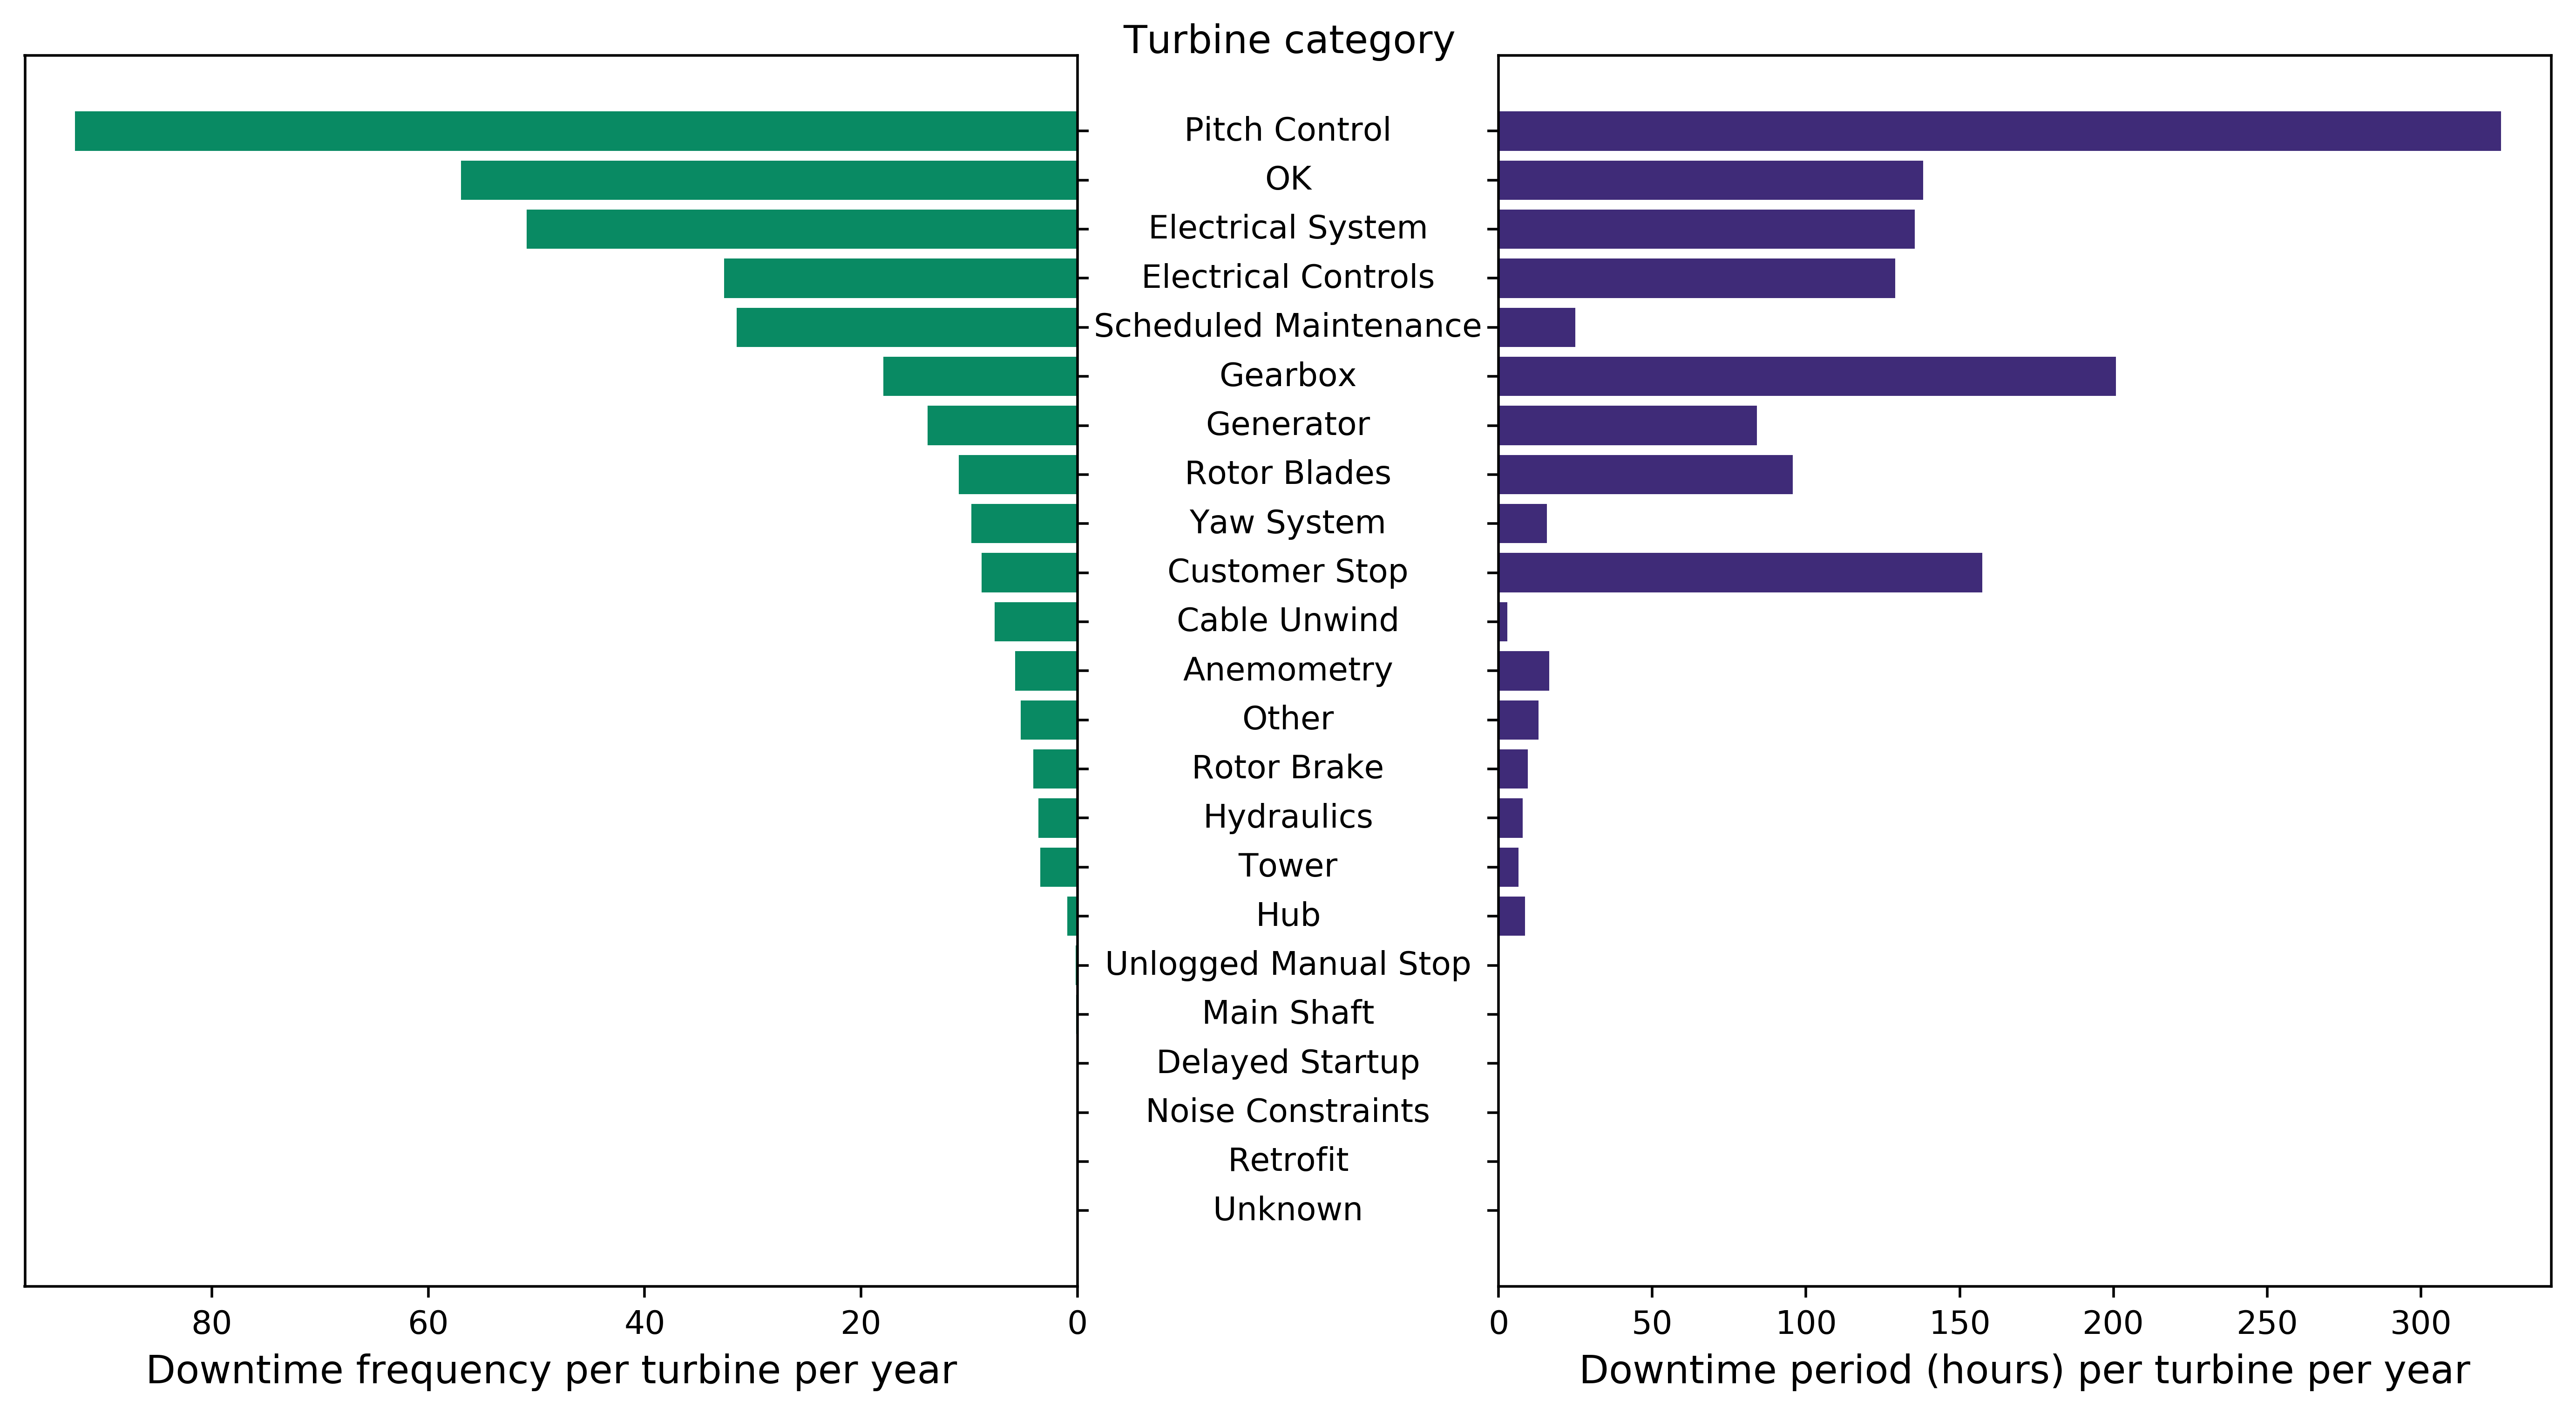

In [31]:
# create plot
fig.subplots_adjust(wspace=.4, hspace=None)
plt.show()